# Exploratory Analysis of Loan Data from Prosper

## Preliminary Wrangling

This notebook explores a dataset containing 113,937 loans with 81 fields on each loan.

In [1]:
# importing all necessary packages and setting plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
sb.set(rc={'figure.figsize':(10, 10)})

> Loading the data into a dataframe

In [2]:
# reading the CSV and loading the data into a dataframe
loan_data = pd.read_csv('prosperLoanData.csv', index_col=None)
loan_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# getting the shape of the dataset
loan_data.shape

(113937, 81)

There are 81 fields available for each of the loan records. We will focus on only a few (20 fields) of these fields for further exploratory analysis. So, we can remove the rest of the fields from the dataset.

In [4]:
# retaining only the required columns in the dataframe
loan_data = loan_data[['LoanNumber', 'LoanOriginalAmount', 'LoanOriginationDate', 'ListingNumber', 'Term', 'LoanStatus', 'BorrowerRate', 'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeRange', 'Recommendations']]
loan_data.shape

(113937, 15)

In [5]:
# renaming the columns
loan_data.columns = ['loan_number', 'loan_original_amount', 'loan_origination_date', 'listing_number', 'term', 'loan_status', 
                     'borrower_rate', 'prosper_score', 'listing_category', 'borrower_state', 'occupation', 'employment_status', 
                     'is_borrower_homeowner', 'income_range', 'recommendations']
loan_data.head()

,loan_number,loan_original_amount,loan_origination_date,listing_number,term,loan_status,borrower_rate,prosper_score,listing_category,borrower_state,occupation,employment_status,is_borrower_homeowner,income_range,recommendations
0,19141,9425,2007-09-12 00:00:00,193129,36,Completed,0.1580,NaN,0,CO,Other,Self-employed,True,"$25,000-49,999",0
1,134815,10000,2014-03-03 00:00:00,1209647,36,Current,0.0920,7.0,2,CO,Professional,Employed,False,"$50,000-74,999",0
2,6466,3001,2007-01-17 00:00:00,81716,36,Completed,0.2750,NaN,0,GA,Other,Not available,False,Not displayed,0
3,77296,10000,2012-11-01 00:00:00,658116,36,Current,0.0974,9.0,16,GA,Skilled Labor,Employed,True,"$25,000-49,999",0
4,102670,15000,2013-09-20 00:00:00,909464,36,Current,0.2085,4.0,2,MN,Executive,Employed,True,"$100,000+",0


In [6]:
# getting information regarding data type and missing values for each field
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_number            113937 non-null  int64  
 1   loan_original_amount   113937 non-null  int64  
 2   loan_origination_date  113937 non-null  object 
 3   listing_number         113937 non-null  int64  
 4   term                   113937 non-null  int64  
 5   loan_status            113937 non-null  object 
 6   borrower_rate          113937 non-null  float64
 7   prosper_score          84853 non-null   float64
 8   listing_category       113937 non-null  int64  
 9   borrower_state         108422 non-null  object 
 10  occupation             110349 non-null  object 
 11  employment_status      111682 non-null  object 
 12  is_borrower_homeowner  113937 non-null  bool   
 13  income_range           113937 non-null  object 
 14  recommendations        113937 non-nu

> Handling the missing values and checking data types of fields in the dataset

We observe that the following fields have missing values - `prosper_score`, `borrower_state`, `occupation`, and `employment_status`

The data types of the fields should also be checked before proceeding with the exploratory analysis. `loan_origination_date` should be of datetime format rather than string. `employment_status`, `income_range` and `loan_status` should be categorical fields rather than strings.

(1) Risk score (`prosper_score`)

In [7]:
# getting the unique values of prosper score
loan_data.prosper_score.unique()

array([nan,  7.,  9.,  4., 10.,  2., 11.,  8.,  5.,  3.,  6.,  1.])

In [8]:
# replacing null values with 0 (prosper score not available)
loan_data.prosper_score.fillna(0, inplace=True)

In [9]:
# converting the field to integer data type since the values never have decimal values
loan_data.prosper_score = loan_data.prosper_score.astype(np.int64)
# checking if the conversion is successful
loan_data.prosper_score.dtype

dtype('int64')

(2) Borrower's State (`borrower_state`)

In [10]:
# getting the unique values of borrower's state
loan_data.borrower_state.unique()

array(['CO', 'GA', 'MN', 'NM', 'KS', 'CA', 'IL', 'MD', nan, 'AL', 'AZ',
       'VA', 'FL', 'PA', 'OR', 'MI', 'NY', 'LA', 'WI', 'OH', 'NC', 'WA',
       'NV', 'NJ', 'TX', 'AR', 'SC', 'DE', 'MO', 'NE', 'UT', 'DC', 'MA',
       'CT', 'IN', 'KY', 'OK', 'MS', 'WV', 'RI', 'TN', 'ID', 'MT', 'HI',
       'NH', 'VT', 'WY', 'ME', 'AK', 'IA', 'SD', 'ND'], dtype=object)

In [11]:
# replacing null values with 'Not Available' (state not available)
loan_data.borrower_state.fillna('Not Available', inplace=True)

(3) `occupation` and `employment_status`

In [12]:
# getting the unique values of occupation
loan_data.occupation.unique()

array(['Other', 'Professional', 'Skilled Labor', 'Executive',
       'Sales - Retail', 'Laborer', 'Food Service', 'Fireman',
       'Waiter/Waitress', 'Construction', 'Computer Programmer',
       'Sales - Commission', 'Retail Management', 'Engineer - Mechanical',
       'Military Enlisted', 'Clerical', nan, 'Teacher', 'Clergy',
       'Accountant/CPA', 'Attorney', 'Nurse (RN)', 'Analyst',
       "Nurse's Aide", 'Investor', 'Realtor', 'Flight Attendant',
       'Nurse (LPN)', 'Military Officer', 'Food Service Management',
       'Truck Driver', 'Administrative Assistant',
       'Police Officer/Correction Officer', 'Social Worker',
       'Tradesman - Mechanic', 'Medical Technician', 'Professor',
       'Postal Service', 'Civil Service', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Architect', 'Landscaping',
       'Tradesman - Carpenter', 'Bus Driver', 'Tradesman - Plumber',
       'Engineer - Chemical', 'Doctor', 'Chemist',


In [13]:
# replacing null values with 'Not Available' (occupation not available)
loan_data.occupation.fillna('Not Available', inplace=True)

In [14]:
# getting the unique values of employment status
loan_data.employment_status.unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

In [15]:
# replacing null values with 'Not available' (employment status not available)
loan_data.employment_status.fillna('Not available', inplace=True)

In [16]:
# converting employment status to category data type
loan_data.employment_status = loan_data.employment_status.astype('category')

(4) `loan_origination_date`

In [17]:
# converting loan_origination_date to datetime format
loan_data.loan_origination_date = pd.to_datetime(loan_data.loan_origination_date)
# checking if the convertion is successful
loan_data.loan_origination_date.dtype

dtype('<M8[ns]')

(5) `loan_status` 

In [18]:
# getting the unique values of loan status
loan_data.loan_status.unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [19]:
# converting loan status to category data type
loan_data.loan_status = loan_data.loan_status.astype('category')

(6) `income_range`

In [20]:
# getting the unique values of income range
loan_data.income_range.unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], dtype=object)

In [21]:
# ordered list of categories 
ordered_categories = ['Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', 
                      '$75,000-99,999', '$100,000+']
# converting to ordered categorical field
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordered_categories)
loan_data.income_range = loan_data.income_range.astype(ordered_var)

In [22]:
# converting income range to category data type
loan_data.income_range = loan_data.income_range.astype('category')

> Verification

In [23]:
# checking missing values and data type for each field
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   loan_number            113937 non-null  int64         
 1   loan_original_amount   113937 non-null  int64         
 2   loan_origination_date  113937 non-null  datetime64[ns]
 3   listing_number         113937 non-null  int64         
 4   term                   113937 non-null  int64         
 5   loan_status            113937 non-null  category      
 6   borrower_rate          113937 non-null  float64       
 7   prosper_score          113937 non-null  int64         
 8   listing_category       113937 non-null  int64         
 9   borrower_state         113937 non-null  object        
 10  occupation             113937 non-null  object        
 11  employment_status      113937 non-null  category      
 12  is_borrower_homeowner  113937 non-null  bool

> There are now, no missing values in the dataframe.

In [24]:
# getting the quartile values and other statistics for the numerical fields
loan_data.describe()

,loan_number,loan_original_amount,listing_number,term,borrower_rate,prosper_score,listing_category,recommendations
count,113937.000000,113937.00000,1.139370e+05,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000
mean,69444.474271,8337.01385,6.278857e+05,40.830248,0.192764,4.43123,2.774209,0.048027
std,38930.479610,6245.80058,3.280762e+05,10.436212,0.074818,3.30703,3.996797,0.332353
min,1.000000,1000.00000,4.000000e+00,12.000000,0.000000,0.00000,0.000000,0.000000
25%,37332.000000,4000.00000,4.009190e+05,36.000000,0.134000,0.00000,1.000000,0.000000
50%,68599.000000,6500.00000,6.005540e+05,36.000000,0.184000,5.00000,1.000000,0.000000
75%,101901.000000,12000.00000,8.926340e+05,36.000000,0.250000,7.00000,3.000000,0.000000
max,136486.000000,35000.00000,1.255725e+06,60.000000,0.497500,11.00000,20.000000,39.000000


### What is the structure of your dataset?

> There are 113,937 loans in the dataset with 81 features out of which we have retained 15 features in order to limit the scope of the analysis. Most variables are numeric in nature, but the variables `loan_status`, `employment_status` and `income_range` are categorical in nature. Further, `income_range` is ordered.

### What is/are the main feature(s) of interest in your dataset?

> The features of interest are those that are useful to predict the status of the loan.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect the employment status of the borrower, income range, prosper score and term to play a major role in the analysis.

### Utility Functions

> These functions will be used so as to avoid repeatation of code that will be frequently required

In [25]:
# if variable is a discrete numerical variable, a continuously binned histogram can be confusing, 
# we set the width of the bars to 70% of the actual width and modify the ticks

# function to plot a histogram
def draw_histogram(data, x, bins, x_ticks, x_label, y_label, title, discrete_variable, rotation=0):
    # setting the figure size
    plt.figure(figsize=[10, 8])
    
    # setting the bar width to 0.7 if the variable is discrete
    if discrete_variable:
        rwidth = 0.7
    else:
        rwidth = 1
    
    # plotting the histogram
    plt.hist(data = data, x = x, bins = bins, rwidth = rwidth)
    # specifying the X and Y axes labels
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    # specifying the X ticks and rotation
    plt.xticks(x_ticks, rotation=rotation)
    # setting the title of the plot
    plt.title(title);

In [26]:
# function to plot a countplot
def draw_countplot(data, x, x_label, y_label, title, y_ticks, rotation=0):
    # setting the color to blue
    default_color = sb.color_palette()[0]
    
    # plotting the countplot
    g = sb.countplot(x=x, data=data, color=default_color, order = data[x].value_counts().index)
    # specifying the X tick labels
    g.set_xticklabels(g.get_xticklabels(), rotation=rotation)
    # specifying the X and Y axes labels
    g.set_xlabel(x_label)
    g.set_ylabel(y_label)
    # specifying the Y ticks
    if y_ticks.size != 0:
        g.set_yticks(y_ticks)
    # setting the title of the plot
    g.set_title(title);

## Univariate Exploration

> Let's take a look at the feature of interest - `loan_status`

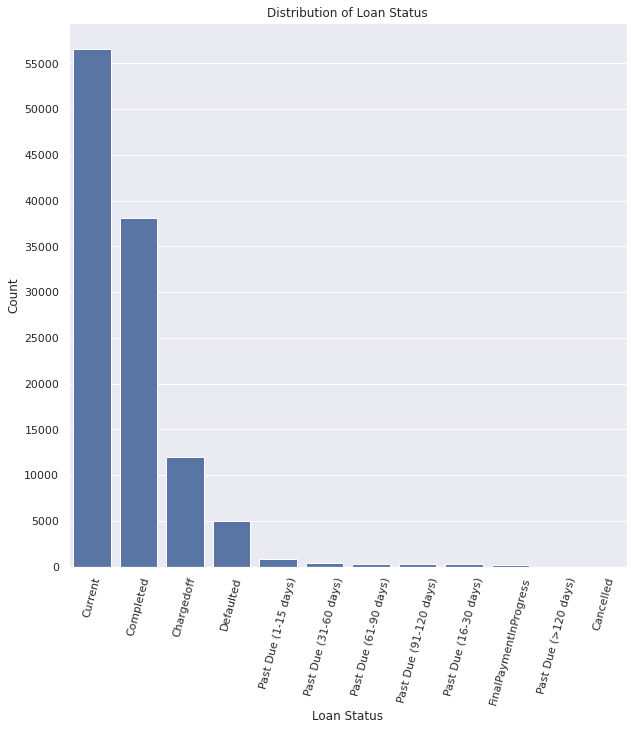

In [27]:
y_ticks = np.arange(0, 60000, 5000)

draw_countplot(loan_data, 'loan_status', 'Loan Status', 'Count', 'Distribution of Loan Status', y_ticks, 75)

> The most number of loans have **current status** and the least number of loans have **cancelled** status.

> Next, let us explore the features that might influence the prediction of the loan status starting with the categorical features `employment_status` and `income_range`.

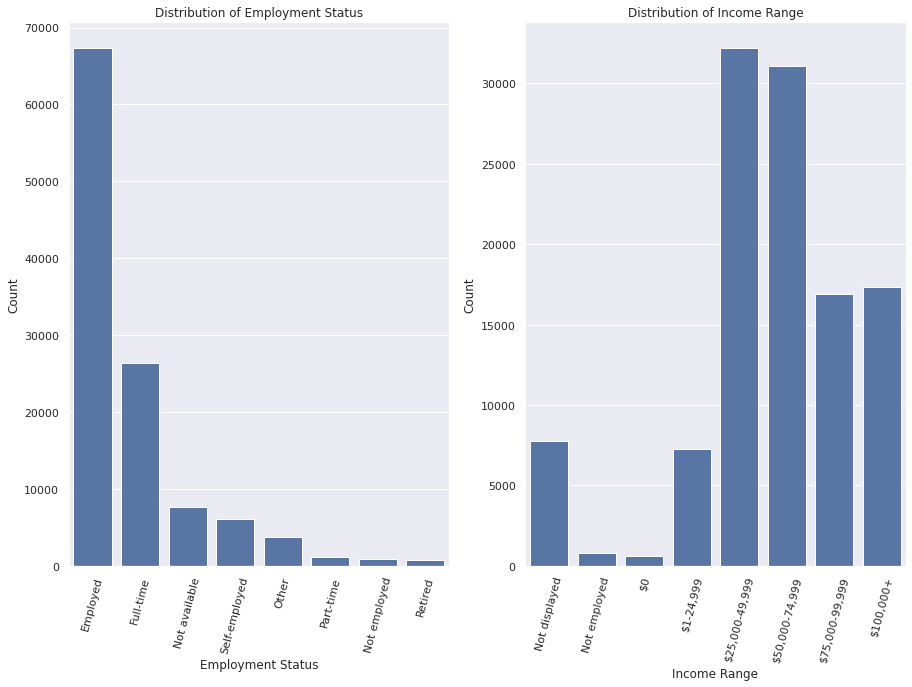

In [28]:
# # setting the color to blue
default_color = sb.color_palette()[0]

# plotting both features to get an idea of each categorical variable's distribution
fig, ax = plt.subplots(ncols=2, figsize = [15, 10])

g1 = sb.countplot(data = loan_data, x = 'employment_status', color = default_color, order = loan_data['employment_status'].value_counts().index, ax = ax[0])

g1.set_xticklabels(g1.get_xticklabels(), rotation=75)
g1.set_xlabel('Employment Status')
g1.set_ylabel('Count')
g1.set_title('Distribution of Employment Status')

g2 = sb.countplot(data = loan_data, x = 'income_range', color = default_color, ax = ax[1])

g2.set_xticklabels(g2.get_xticklabels(), rotation=75)
g2.set_xlabel('Income Range')
g2.set_ylabel('Count')
g2.set_title('Distribution of Income Range')

plt.show();

> From the above graphs, we can observe that the majority of the loan applicants are employed and most of the applicants make 25,000 dollars or more

> Let's now look at `borrower_rate`, `prosper_score` and `term`

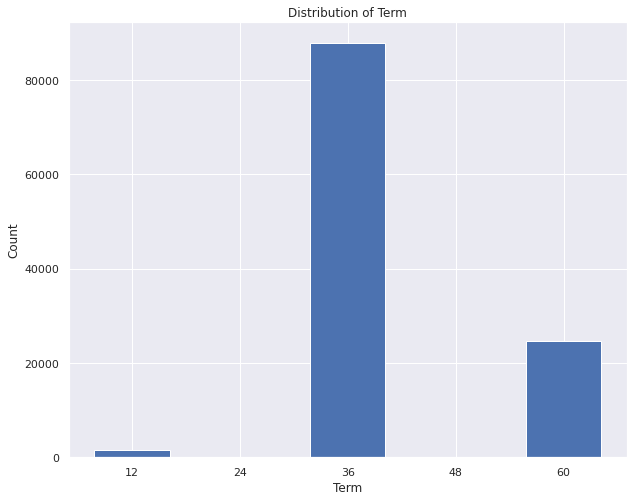

In [29]:
# plotting the distribution of term
bins = np.arange(6, loan_data['term'].max()+18, 12)
x_ticks = np.arange(12, loan_data['term'].max()+12, 12)

draw_histogram(loan_data, 'term', bins, x_ticks, 'Term', 'Count', 'Distribution of Term', True)

> Most of the loans have a term of 3 years (36 months)

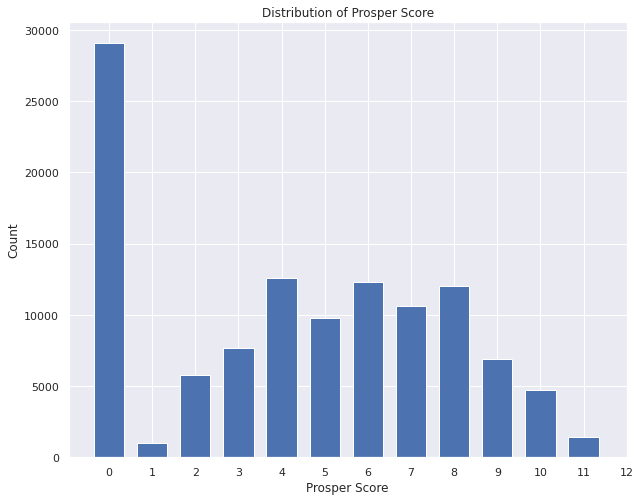

In [30]:
# plotting the distribution of prosper score
bins = np.arange(-0.5, loan_data['prosper_score'].max()+1.5)
x_ticks = np.arange(0, loan_data['prosper_score'].max()+1.5)

draw_histogram(loan_data, 'prosper_score', bins, x_ticks, 'Prosper Score', 'Count', 'Distribution of Prosper Score', True)

In [31]:
# checking the value counts
loan_data['prosper_score'].value_counts()

0     29084
4     12595
6     12278
8     12053
7     10597
5      9813
3      7642
9      6911
2      5766
10     4750
11     1456
1       992
Name: prosper_score, dtype: int64

> Prosper score ranges from 0-10 where 0 indicates high risk and 10 indicates very low/no risk. The prosper score of zero was imputed by us while handling missing data. Hence, it just implies that the score was not available and can be ignored. Next, the records with score 11 (outlier) should not be considered for further analysis. Let's remove the records having a prosper score of 11.

In [32]:
# dropping records having prosper score of 11
loan_data.drop(loan_data[loan_data.prosper_score == 11].index, inplace=True)
loan_data.shape

(112481, 15)

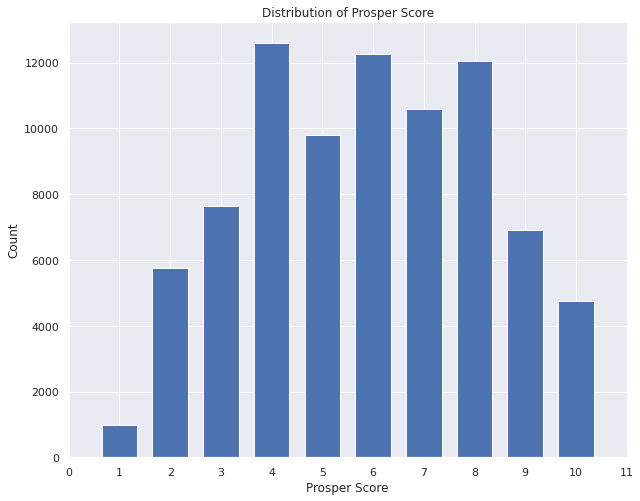

In [33]:
# plotting the distribution of prosper score after zooming in to remove the outliers
bins = np.arange(0.5, loan_data['prosper_score'].max()+1.5)
x_ticks = np.arange(0, loan_data['prosper_score'].max()+1.5)

draw_histogram(loan_data, 'prosper_score', bins, x_ticks, 'Prosper Score', 'Count', 'Distribution of Prosper Score', True)

> Out of the valid prosper scores, the most common score is 4 and the least common score is 1 and quite a few of the loan applicants have a perfect score of 10.

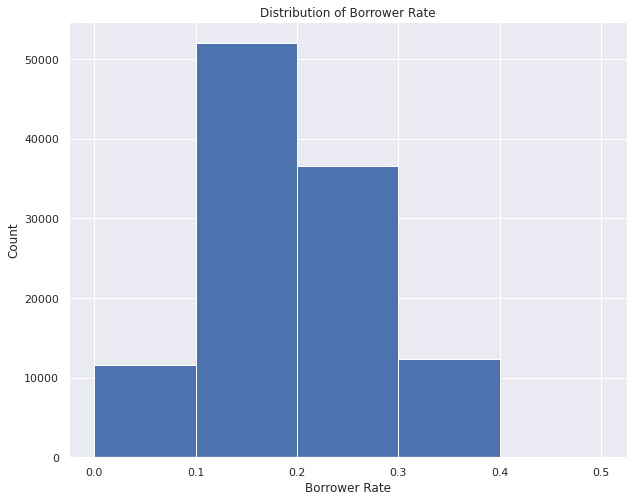

In [34]:
# plotting the distribution of borrower rate
bins = np.arange(0, loan_data['borrower_rate'].max()+0.1, 0.1)

draw_histogram(loan_data, 'borrower_rate', bins, bins, 'Borrower Rate', 'Count', 'Distribution of Borrower Rate', False)

> The borrower rate is beween 0.1 and 0.2 for more than 50,000 loan applicants. This is the highest among the bins considered.

> Let's explore at the other variables to see if there are any interesting patterns

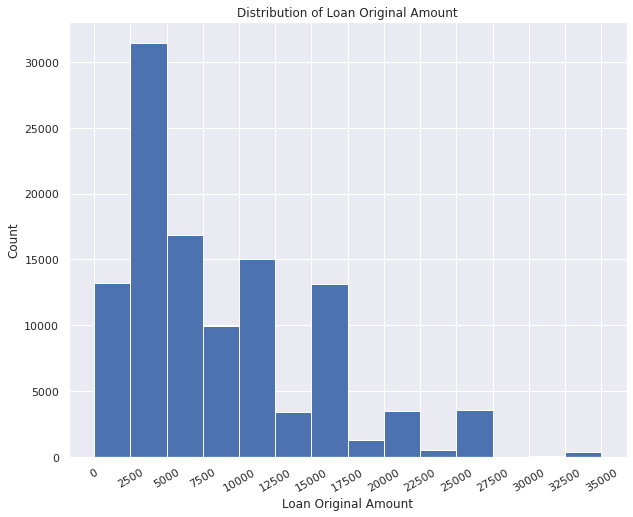

In [35]:
# plotting the distribution of loan original amount
bins = np.arange(0, loan_data['loan_original_amount'].max()+2500, 2500)

draw_histogram(loan_data, 'loan_original_amount', bins, bins, 'Loan Original Amount', 'Count', 'Distribution of Loan Original Amount', False, 30)

> The distribution of original loan amount is unimodal with mode between 2500 and 5000

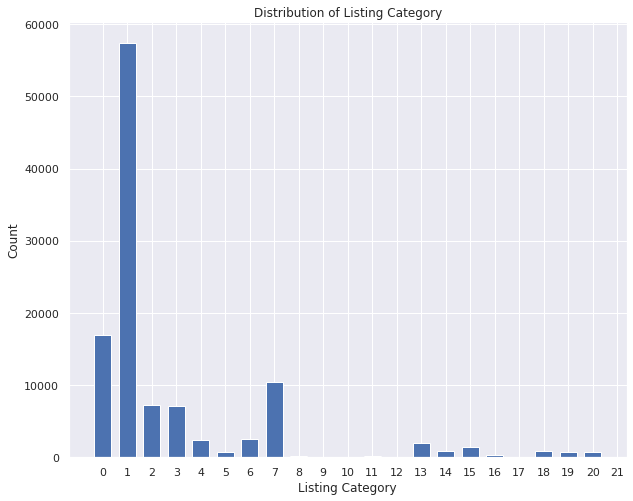

In [36]:
# plotting the distribution of listing category
bins = np.arange(-0.5, loan_data['listing_category'].max()+1.5)
x_ticks = np.arange(0, loan_data['listing_category'].max()+1.5)

draw_histogram(loan_data, 'listing_category', bins, x_ticks, 'Listing Category', 'Count', 'Distribution of Listing Category', True)

> The listing categories are represented using sequential numbers (in the range 0-20). The most number of loans belong to category 1 (Debt Consolidation).

In [37]:
# getting the number of homeowners and non homeowners in the dataset
loan_data.is_borrower_homeowner.value_counts()

True     56505
False    55976
Name: is_borrower_homeowner, dtype: int64

> The number of home owners is slightly higher than the number of non home owners

In [38]:
loan_data.recommendations.value_counts()

0     108264
1       3480
2        562
3        108
4         26
5         14
9          6
7          5
6          4
8          3
16         2
18         2
24         1
14         1
19         1
21         1
39         1
Name: recommendations, dtype: int64

> Most of the loan applicants do not have a recommendation and only a small fraction have more than 2 recommendations

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Loan status is the variable of interest. It is of categorical type. There were no unusual points and no transformations were performed. Majority of the loans have current status while very few were cancelled.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The prosper score can have values between 1 and 10. However, some records have a score of 11. These records were removed for safety. There were also some records with score 0. However, this was imputed during the preliminary data wrangling stage wherever there is no value available for the score.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!